In [16]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('seaborn')
sns.set(font_scale=2.5) 
# 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.

import plotly.offline as py
py.init_notebook_mode(connected=True) #결과 html -> jupyter notebook 사용

import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
#bring in the six packs
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

#승객총원 배우자 + 아이들 + 본인
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [12]:
df_train.describe()
# df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [10]:
#descriptive statistics summary
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [29]:
#Null 값 체크 train
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
print('-'*20)
#test
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)    

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%
column: FamilySize	 Percent of NaN value: 0.00%
--------------------
column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ti

<AxesSubplot:>

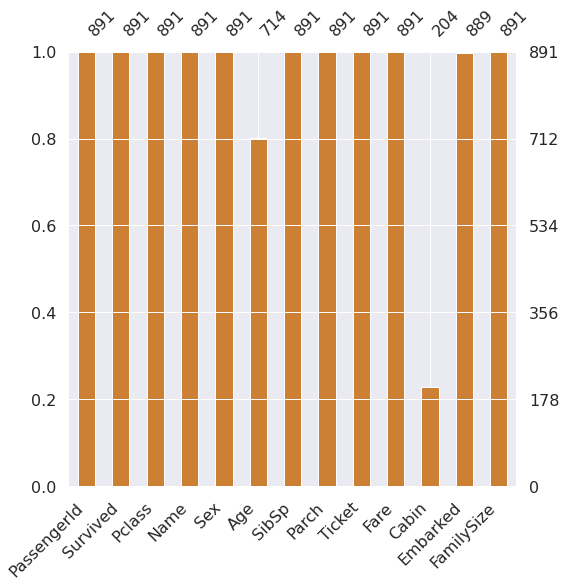

In [20]:
# msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

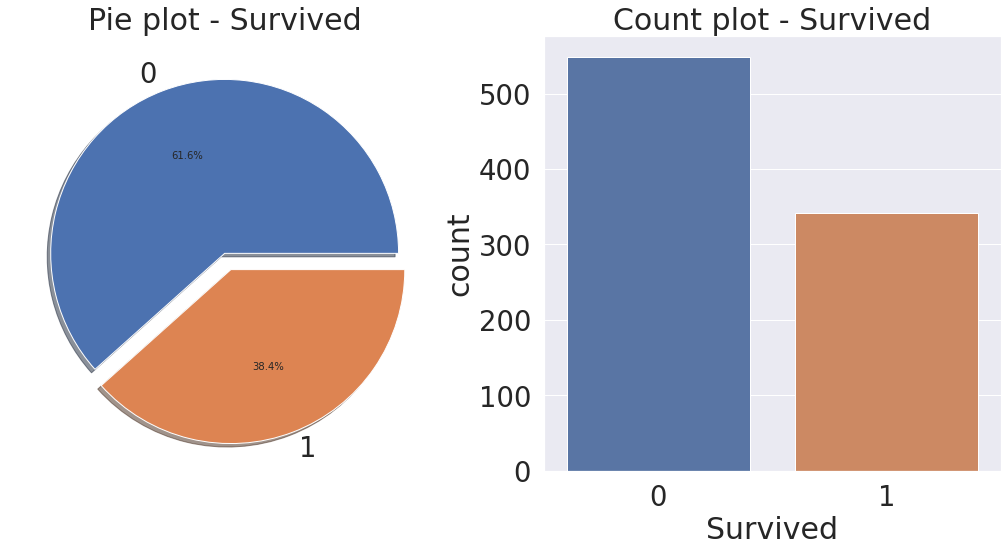

In [21]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [32]:
#Pclass
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [38]:
#Pclass

#범주형 데이터이므로 one-hot-encoding을 pd.get_dummies() 메서드로 인코딩합시다.
# pclass_train_dummies = pd.get_dummies(df_train['Pclass'])
# pclass_test_dummies = pd.get_dummies(df_test['Pclass'])

# df_train.drop(['Pclass'], axis=1, inplace=True)
# df_test.drop(['Pclass'], axis=1, inplace=True)

df_train = df_train.join(pclass_train_dummies)
df_test = df_test.join(pclass_test_dummies)


KeyError: 'Pclass'

In [43]:
df_train
df_test

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,1,2,3
0,892,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0,0,1
2,894,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0,1,0
3,895,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,0,0,1
414,1306,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,1,0,0
415,1307,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,0,0,1
416,1308,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,0,0,1


In [44]:
#Sex 범주형

sex_train_dummies = pd.get_dummies(df_train['Sex'])
sex_test_dummies = pd.get_dummies(df_test['Sex'])

sex_train_dummies.columns = ['Female', 'Male']
sex_test_dummies.columns = ['Female', 'Male']

df_train.drop(['Sex'], axis=1, inplace=True)
df_test.drop(['Sex'], axis=1, inplace=True)

df_train = df_train.join(sex_train_dummies)
df_test = df_test.join(sex_test_dummies)

In [46]:
#Age Null 값 처리

df_train["Age"].fillna(df_train["Age"].mean() , inplace=True)
df_test["Age"].fillna(df_train["Age"].mean() , inplace=True)



# 출처: https://rfriend.tistory.com/542 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]
# missing_fill_val = {'a': 0, 
#                     'b': df.b.mean(), 
#                     'c': df.c.median(), 
#                     'd': 'Unknown', 
#                     'e': df.e.interpolate()}
# df2 = df.fillna(missing_fill_val)  new dataframe
# df.fillna(missing_fill_val, inplace=True) overwrite dataframe


In [49]:

#누락이 아닌 무단 탑승이라 생각하고 0
df_test["Fare"].fillna(0, inplace=True)

In [51]:
df_train_df = df_train.drop(['Cabin'], axis=1)
df_test_df = df_test.drop(['Cabin'], axis=1)

In [52]:

df_train['Embarked'].value_counts()
df_test['Embarked'].value_counts()

df_train["Embarked"].fillna('S', inplace=True)
df_test["Embarked"].fillna('S', inplace=True)

In [53]:
#탑승항구(범주 S,C,Q)
embarked_train_dummies = pd.get_dummies(df_train['Embarked'])
embarked_test_dummies = pd.get_dummies(df_test['Embarked'])

embarked_train_dummies.columns = ['S', 'C', 'Q']
embarked_test_dummies.columns = ['S', 'C', 'Q']

df_train.drop(['Embarked'], axis=1, inplace=True)
df_test.drop(['Embarked'], axis=1, inplace=True)

df_train = df_train.join(embarked_train_dummies)
df_test = df_test.join(embarked_test_dummies)